# Lab 02 &mdash; Python Libraries &mdash; practice


**Please enter in the cell below your first name, last name, and student ID**

1. Load the *CDC's BRFSS* survey data into a pandas dataframe and generate a (non-random) sample by selecting the first 400 observations (*tip:* generate a new dataframe out of the slice). Make a scatterplot of weight (`weight`) vs desired weight (`wtdesire`)
    * Describe the statistical relationship betweeen the two variables

   weight  wtdesire
0     175       175
1     125       115
2     105       105
3     132       124
4     150       130


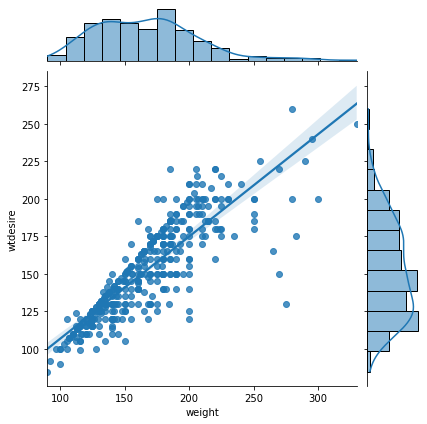

In [1]:
# code for exercise 1
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Solution
# Loading data and slicing it 
data = pd.read_csv("cdc.csv")
df = data.iloc[0:400]

# Constructing a dataframe using dataframe Constructor
vs_weight = pd.DataFrame(df, columns = ['weight', 'wtdesire'])
print(vs_weight.head())

# Plotting
sns.jointplot(x="weight", y="wtdesire", data=vs_weight, kind='reg')
plt.show()

2. Add in your sample a new variable called `wdiff`, defined as the difference between desired weight and actual weight. Plot a frequency histogram for `wdiff` and report summary statistics
    * Describe what it means for `wdiff` to be equals to/below/above 0
    * What do the shape of the histogram and statistics tell us about how people feel about their weight?

     weight  wtdesire  wdiff
0       175       175      0
1       125       115     10
2       105       105      0
3       132       124      8
4       150       130     20
..      ...       ...    ...
395     185       185      0
396     200       200      0
397     200       200      0
398     175       160     15
399     130       110     20

[400 rows x 3 columns]


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


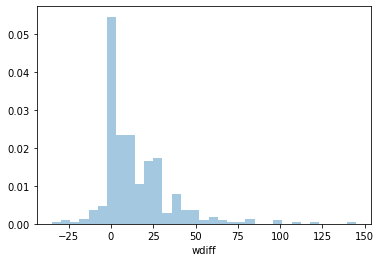

In [2]:
# code for exercise 2

# Solution

wdiff = vs_weight.weight - vs_weight.wtdesire
#print(wdiff)
vs_weight['wdiff'] = wdiff
print(vs_weight)

sns.distplot(vs_weight.wdiff, kde=False, norm_hist=True)
plt.show()

* Majority of people are ok with their weight right now, as we see them most on a weight difference of zero

* The second majoirty of people are tending to lose their weight as much as they can, as the weight difference is positive

3. Using your sample, construct a contingency table for variables `gender` and `smoke100`
    * Compute the difference $P(smoke100=1 \mid gender=m) - P(smoke100=1 \mid gender=f)$

In [3]:
# code for exercise 3
data_crosstab = pd.crosstab(data['smoke100'], 
                            data['gender'],
                                normalize = True, margins = True)
print(data_crosstab)

gender          f        m      All
smoke100                           
0         0.30060  0.22735  0.52795
1         0.22095  0.25110  0.47205
All       0.52155  0.47845  1.00000


4. Recall the CPU benchmarks example of Chapter 03, part 6, where the multi-core (MC) processor ratings in the market follow the distribution $\mathcal{N}(90000,10000^2)$. Denote with $X$ the corresponding random variable. Assume two new processors *CPU_l* (lower-end) and *CPU_h* (higher-end) are launched into the market, and that they obtain ratings $X_l=100000$ and $X_h=120000$, respectively. 
    * Compute the z scores for $X_l$ and $X_h$ 
    * Compute the probabilities that 
        * A pre-existing MC processor performs better than *CPU_h* (i.e., $P(X > X_h)$)
        * A pre-existing MC processor performs in-between *CPU_l* and *CPU_h*


In [4]:
# code for exercise 4
import numpy as np
from scipy import stats

# Solution
mu = 90000
stdev = 10000
X_l = 100000
X_h = 120000

zscore_Xl = (X_l - mu)/stdev
zscore_Xh = (X_h - mu)/stdev

print("Z-Scores :", zscore_Xl,zscore_Xh)

p_Xl = stats.norm.cdf(zscore_Xl)
p_Xh = stats.norm.cdf(zscore_Xh)

#print(p_Xl,p_Xh)

p_gXh = 1 - p_Xh
print("P(X>Xh) :", p_gXh)

p_Xlh = p_Xh - p_Xl
print("P(X_l<=X<=X_h) :", p_Xlh)

Z-Scores : 1.0 3.0
P(X>Xh) : 0.0013498980316301035
P(X_l<=X<=X_h) : 0.15730535589982697


5. What's the expected value and variance of the volume of a sphere with random radius $\sim \mathcal{N}(0.5,0.1^2)$ cm?

In [5]:
# code for exercise 5

# Solution
from random import seed
from random import random
mu = 0.5
stdev = 0.1
my_norm = stats.norm(loc=mu, scale=stdev)
seed(42)
r = random()
print("radius:", r)
vol= lambda r: (4/3)*3.14*(r**3) #volume of a sphere
print("Volume:", vol(r))
print(my_norm.expect(vol))
print(my_norm.var())
print(my_norm.mean())

radius: 0.6394267984578837
Volume: 1.0945633080782202
0.5861333333333334
0.010000000000000002
0.5
